In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('https://pedromeerholz-churn-ml.s3.sa-east-1.amazonaws.com/Churn_Modelling.csv')
df.shape

(10000, 14)

# Análise de Dados

## Informações básicas

In [143]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
df.drop('RowNumber', axis=1, inplace=True)

In [145]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [147]:
df.duplicated().sum()

np.int64(0)

In [148]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [149]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [150]:
churn_df = df[df['Exited'] == 1]
churn_df.drop('CustomerId', axis=1, inplace=True)
churn_df.shape

/tmp/ipykernel_215299/2136387196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.drop('CustomerId', axis=1, inplace=True)


(2037, 12)

In [151]:
no_churn_df = df[df['Exited'] == 0]
no_churn_df.drop('CustomerId', axis=1, inplace=True)
no_churn_df.shape

/tmp/ipykernel_215299/3771563722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_churn_df.drop('CustomerId', axis=1, inplace=True)


(7963, 12)

## Variáveis Categoricas

In [152]:
def plot_value_counts(df, column, title_posfix):
    plt.figure(figsize=(10, 5))
    plt.title(f'Boxplot {column} - {title_posfix}')
    sns.barplot(df[column].value_counts())
    plt.xlabel(column)
    plt.show()
    plt.close()

### Geral

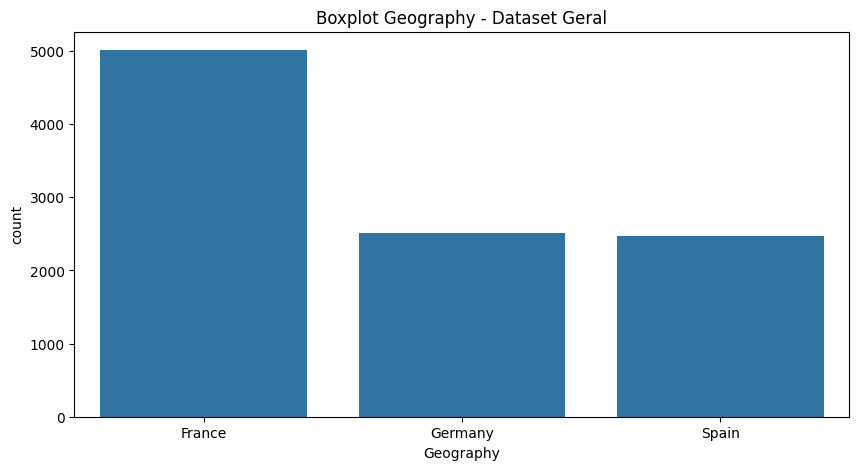

In [153]:
plot_value_counts(df, 'Geography', 'Dataset Geral')

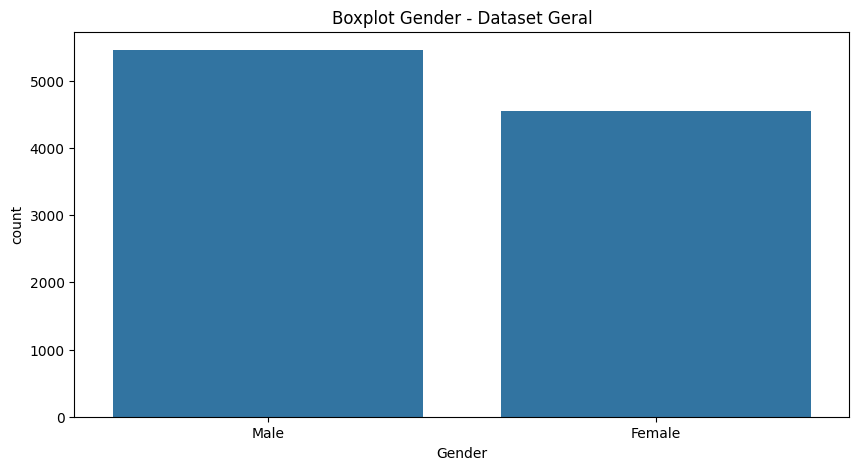

In [154]:
plot_value_counts(df, 'Gender', 'Dataset Geral')

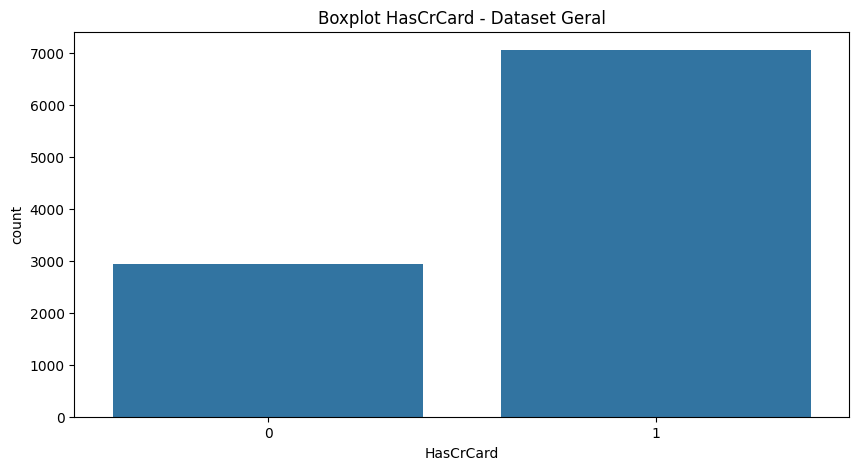

In [155]:
plot_value_counts(df, 'HasCrCard', 'Dataset Geral')

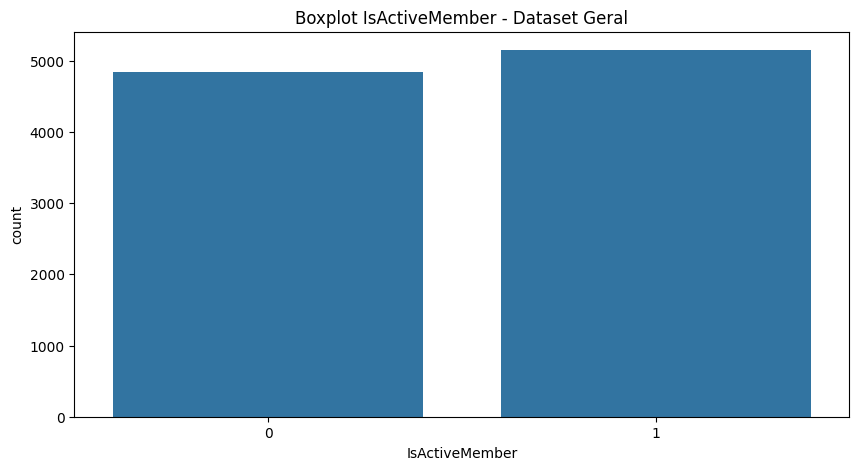

In [156]:
plot_value_counts(df, 'IsActiveMember', 'Dataset Geral')

### Clientes sem churn

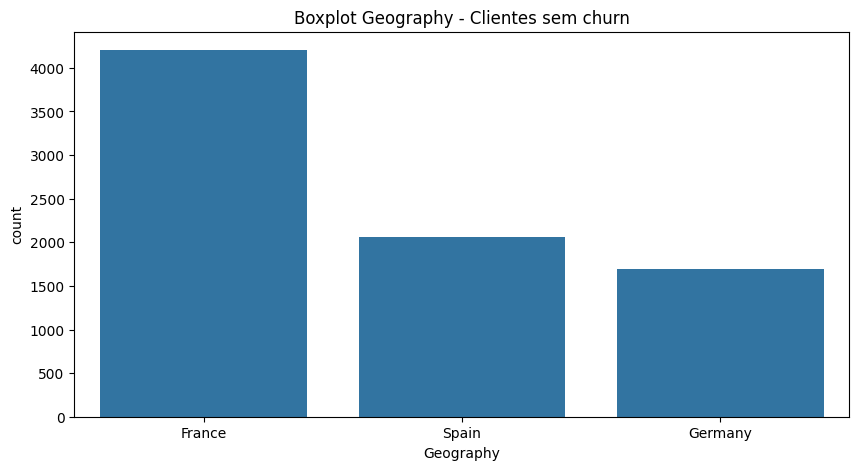

In [157]:
plot_value_counts(no_churn_df, 'Geography', 'Clientes sem churn')

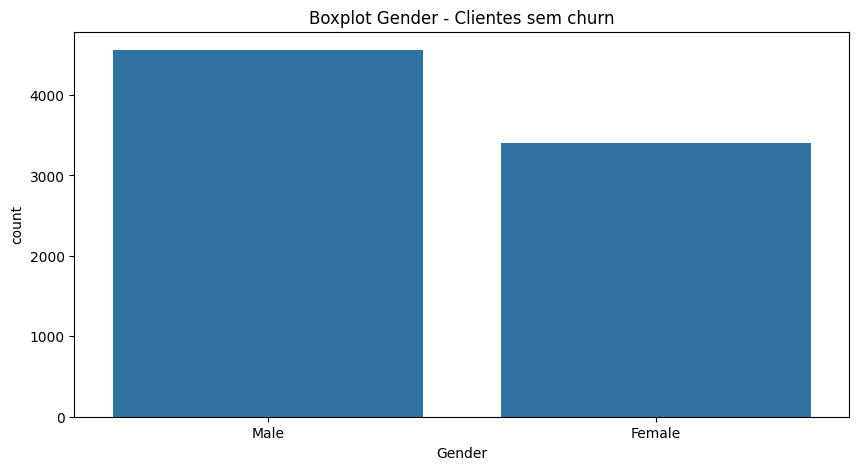

In [158]:
plot_value_counts(no_churn_df, 'Gender', 'Clientes sem churn')

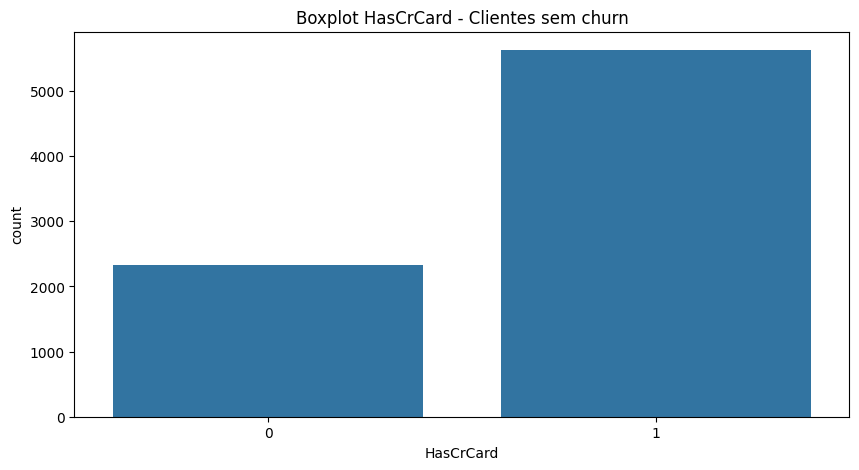

In [159]:
plot_value_counts(no_churn_df, 'HasCrCard', 'Clientes sem churn')

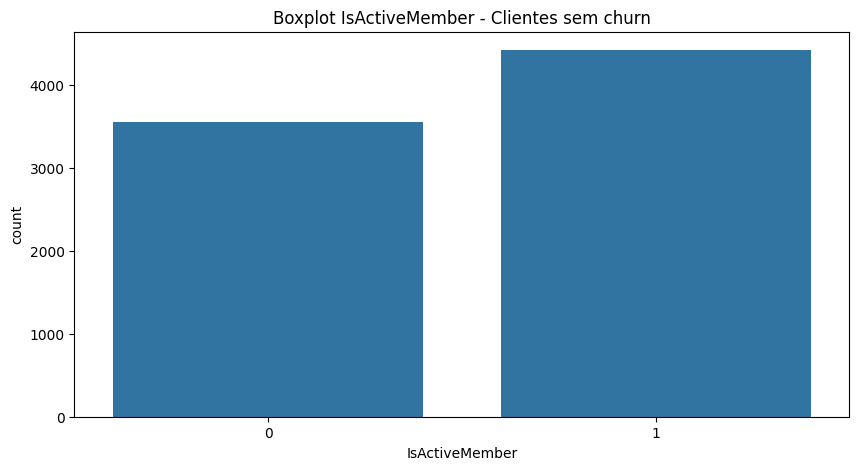

In [160]:
plot_value_counts(no_churn_df, 'IsActiveMember', 'Clientes sem churn')

### Clientes com churn

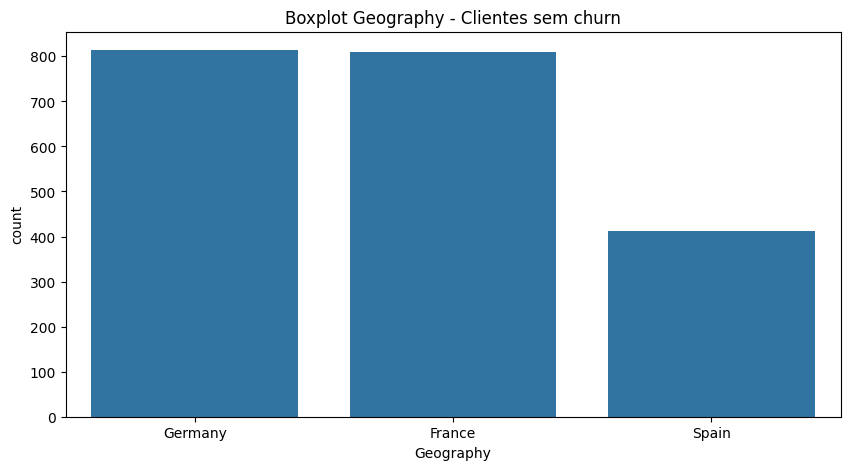

In [161]:
plot_value_counts(churn_df, 'Geography', 'Clientes sem churn')

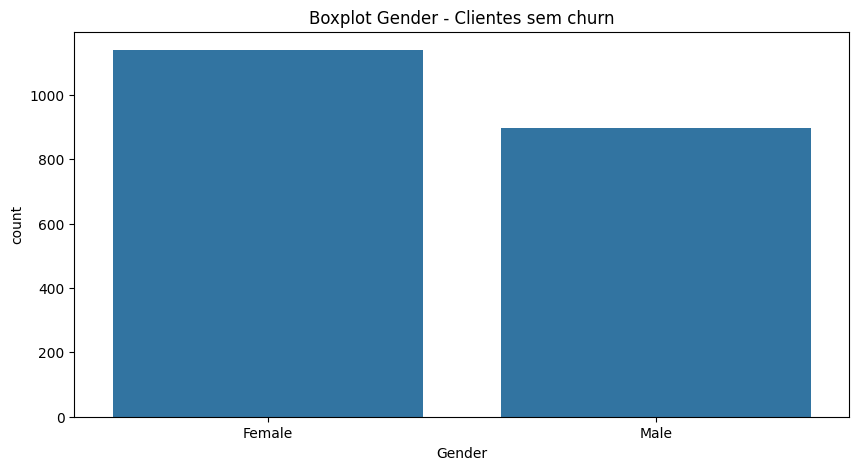

In [162]:
plot_value_counts(churn_df, 'Gender', 'Clientes sem churn')

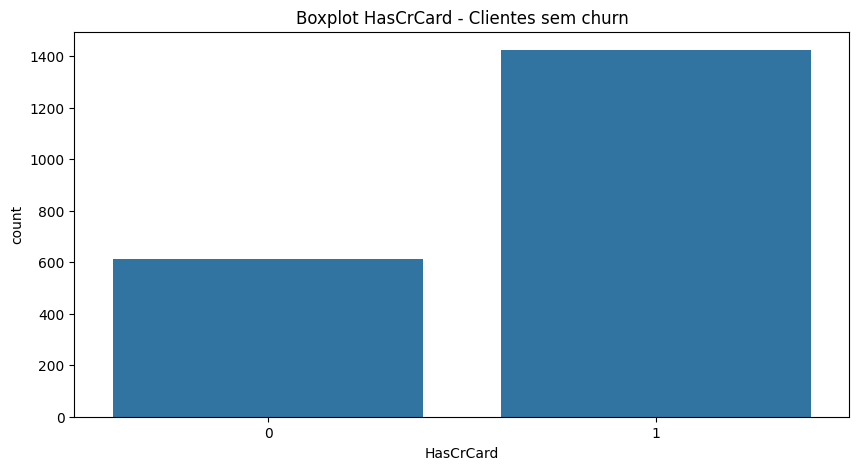

In [163]:
plot_value_counts(churn_df, 'HasCrCard', 'Clientes sem churn')

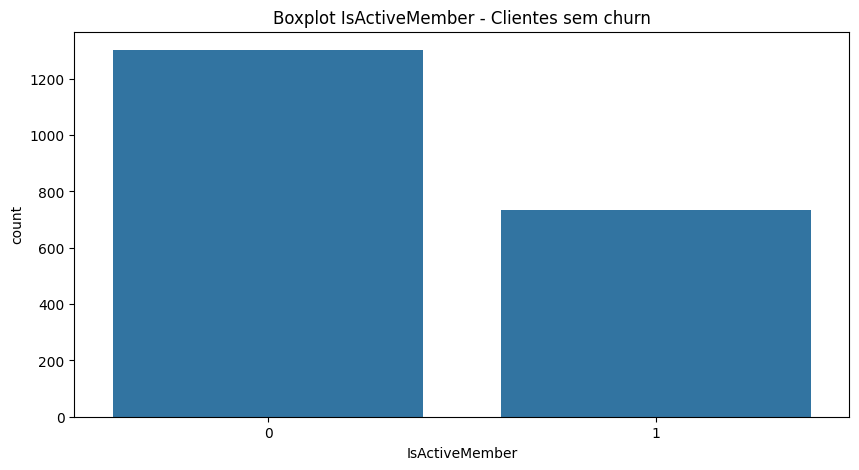

In [164]:
plot_value_counts(churn_df, 'IsActiveMember', 'Clientes sem churn')

In [165]:
len(df['Surname'].unique())

2932

## Histogramas

In [166]:
def histogram(df, column, title_posfix):
    plt.figure(figsize=(10, 5))
    plt.title(f'Boxplot {column} - {title_posfix}')
    sns.histplot(x=df[column], kde=True)
    plt.xlabel(column)
    plt.show()
    plt.close()

### Geral

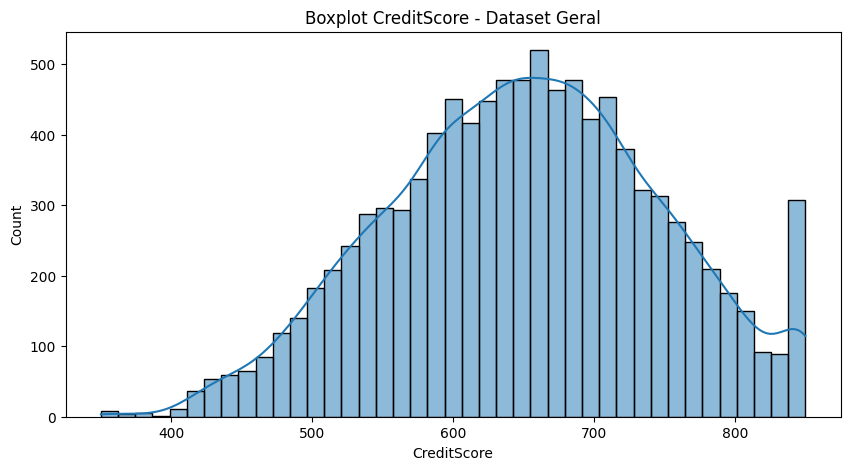

In [167]:
histogram(df, 'CreditScore', 'Dataset Geral')

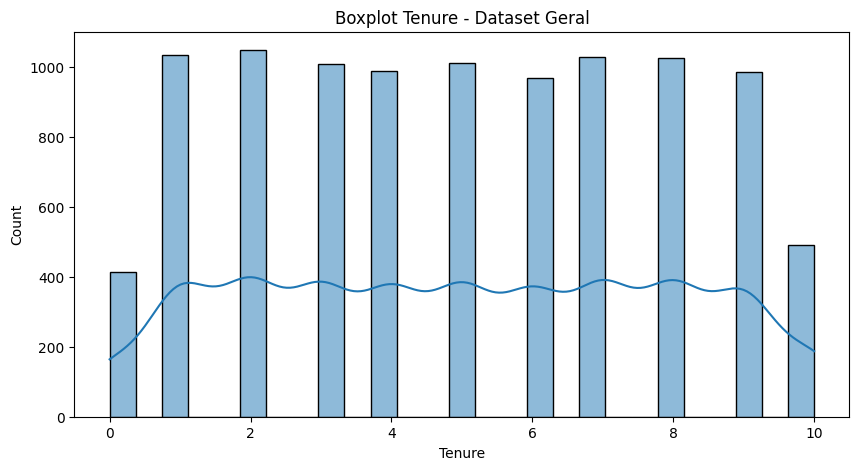

In [168]:
histogram(df, 'Tenure', 'Dataset Geral')

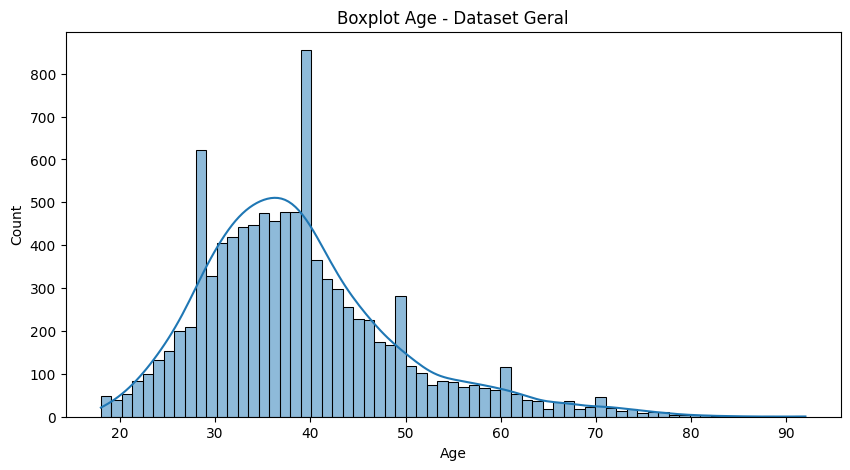

In [169]:
histogram(df, 'Age', 'Dataset Geral')

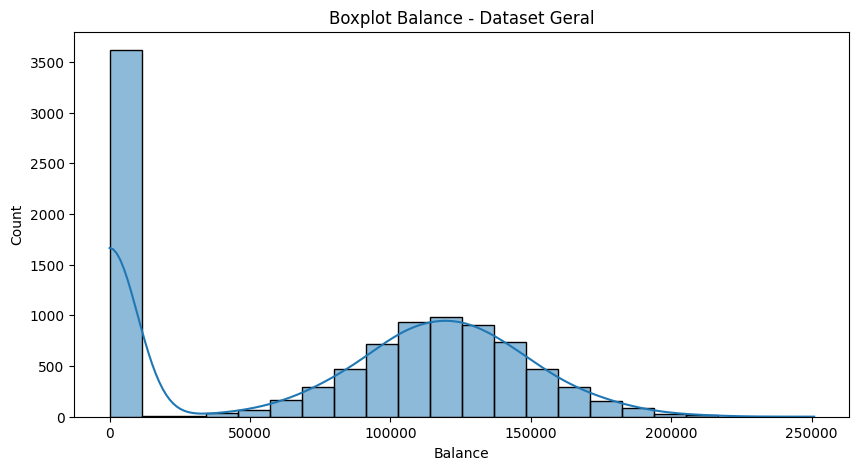

In [170]:
histogram(df, 'Balance', 'Dataset Geral')

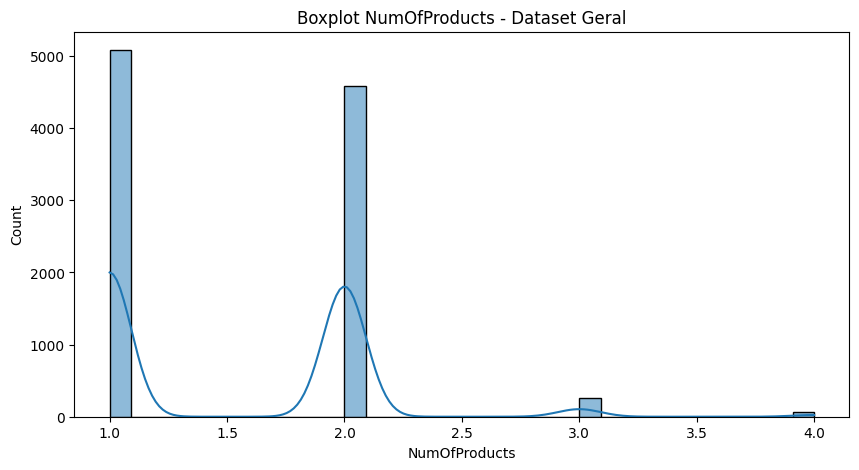

In [171]:
histogram(df, 'NumOfProducts', 'Dataset Geral')

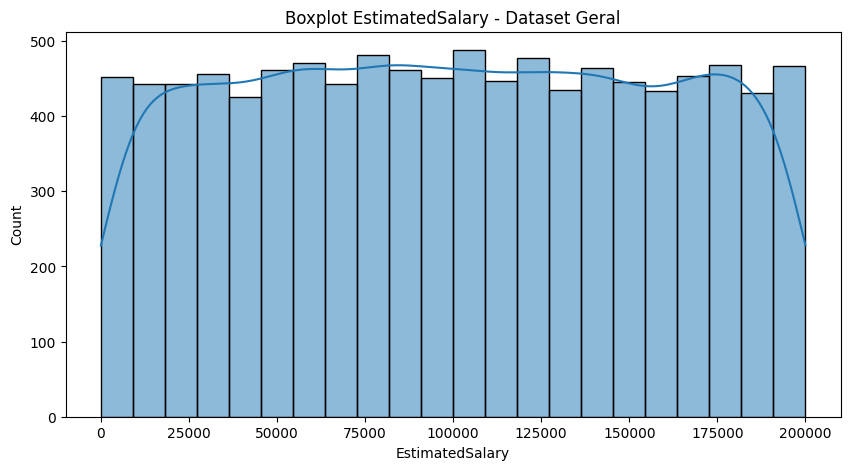

In [172]:
histogram(df, 'EstimatedSalary', 'Dataset Geral')

### Clientes sem churn

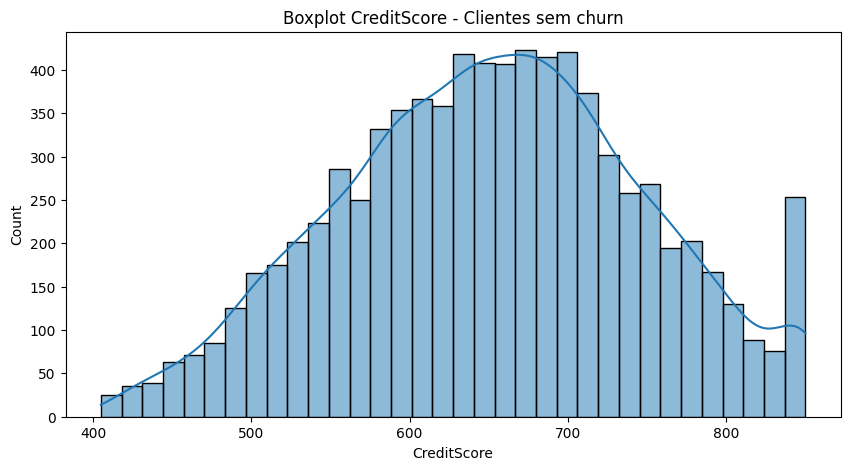

In [173]:
histogram(no_churn_df, 'CreditScore', 'Clientes sem churn')

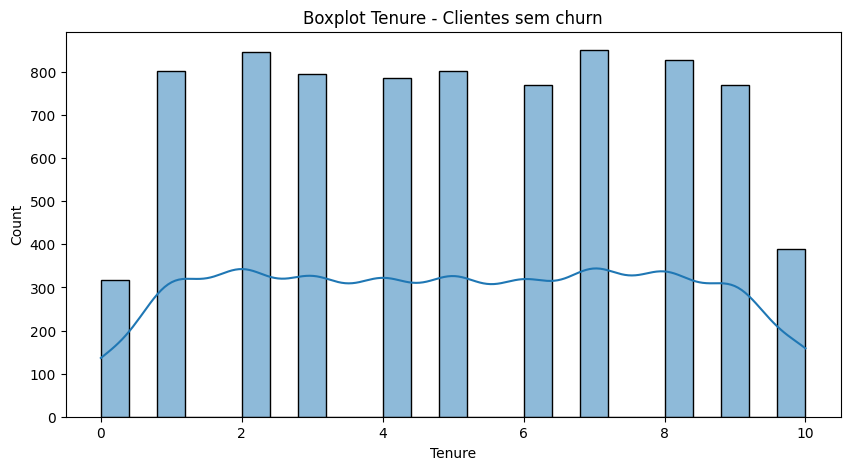

In [174]:
histogram(no_churn_df, 'Tenure', 'Clientes sem churn')

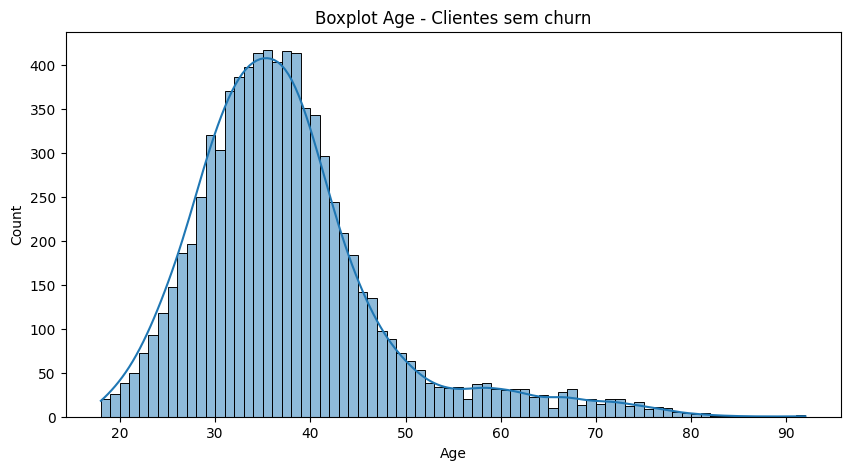

In [175]:
histogram(no_churn_df, 'Age', 'Clientes sem churn')

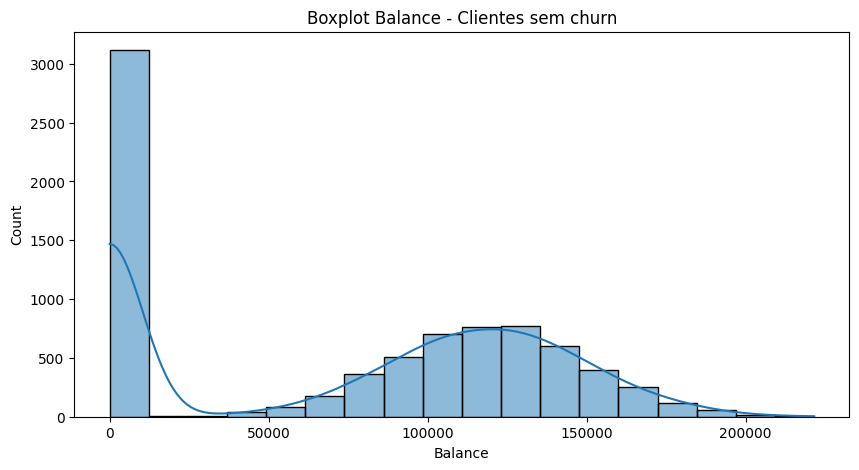

In [176]:
histogram(no_churn_df, 'Balance', 'Clientes sem churn')

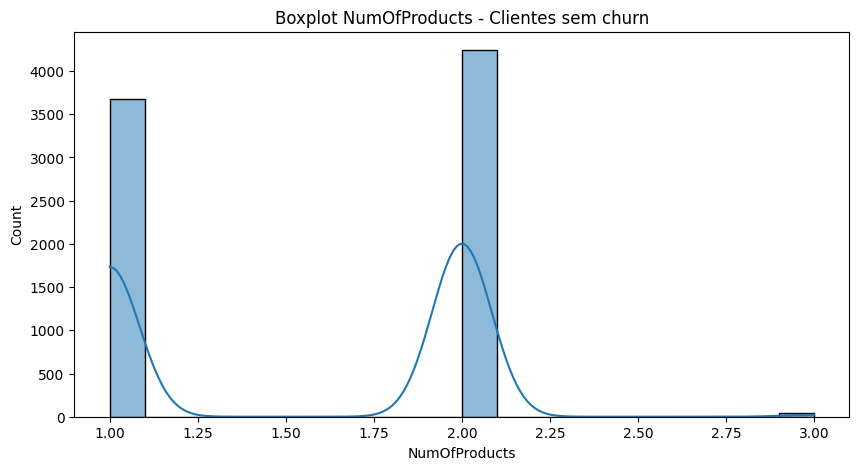

In [177]:
histogram(no_churn_df, 'NumOfProducts', 'Clientes sem churn')

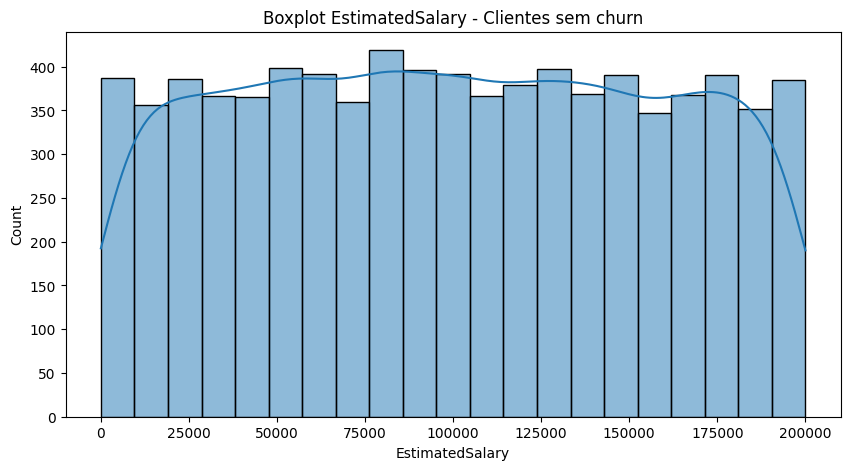

In [178]:
histogram(no_churn_df, 'EstimatedSalary', 'Clientes sem churn')

### Clientes com churn

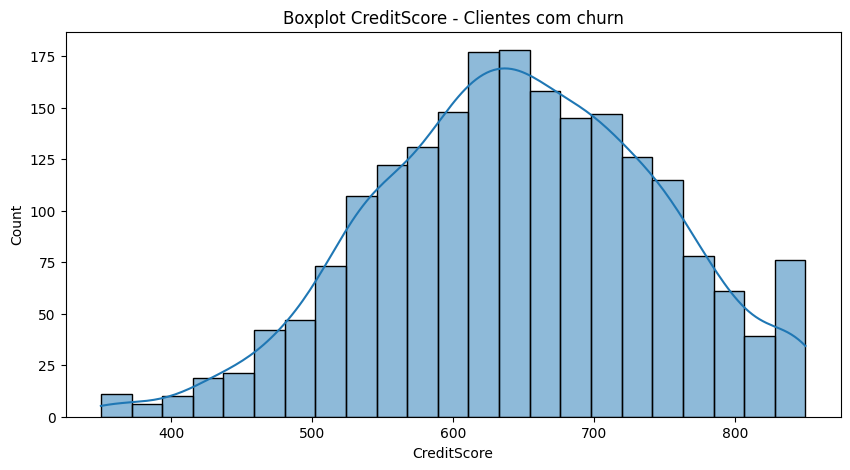

In [179]:
histogram(churn_df, 'CreditScore', 'Clientes com churn')

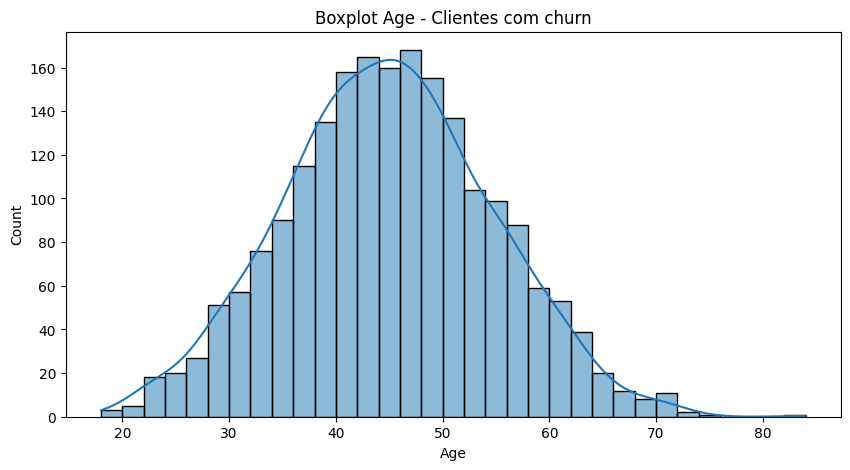

In [180]:
histogram(churn_df, 'Age', 'Clientes com churn')

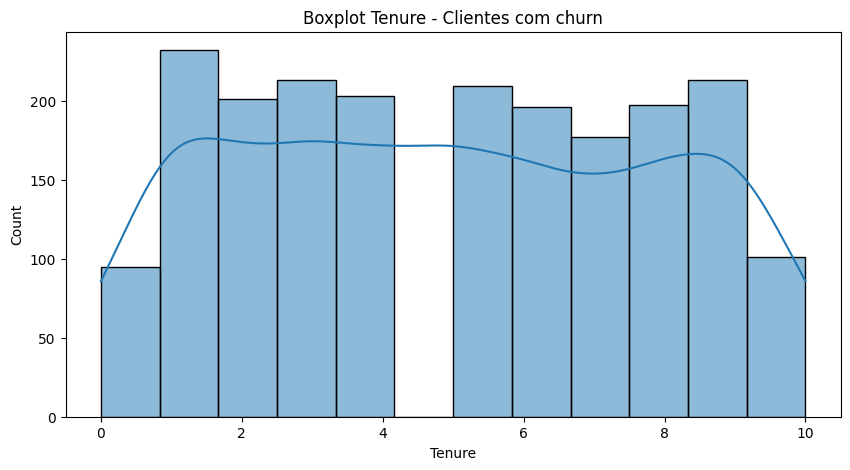

In [181]:
histogram(churn_df, 'Tenure', 'Clientes com churn')

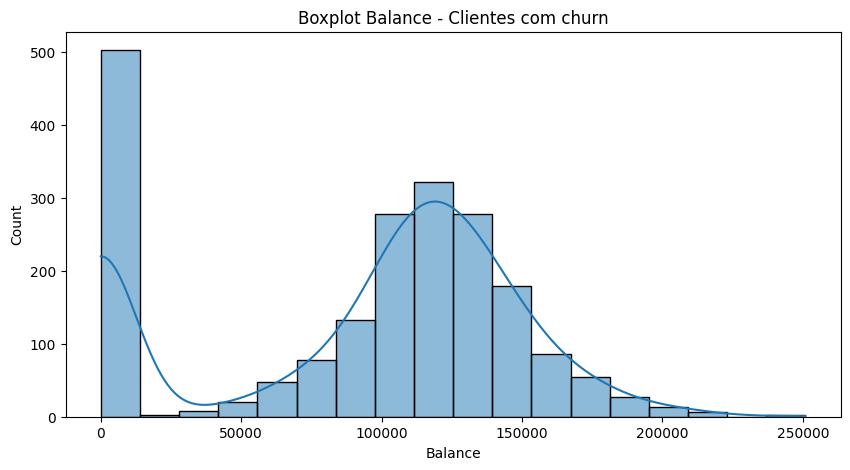

In [182]:
histogram(churn_df, 'Balance', 'Clientes com churn')

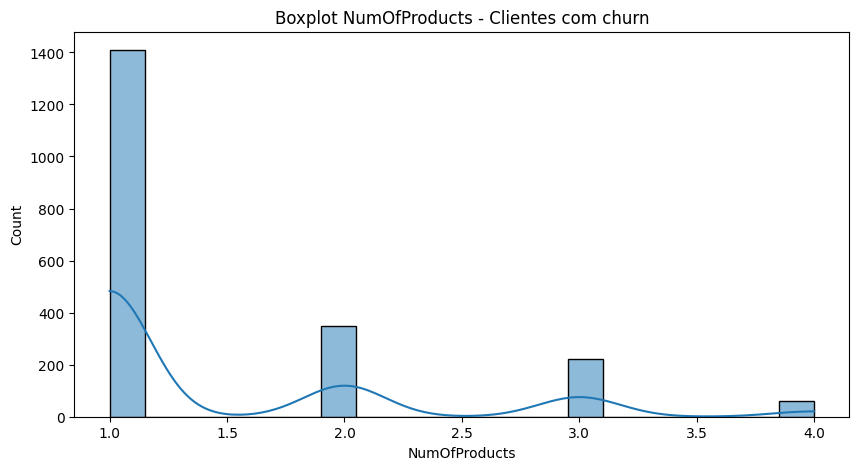

In [183]:
histogram(churn_df, 'NumOfProducts', 'Clientes com churn')

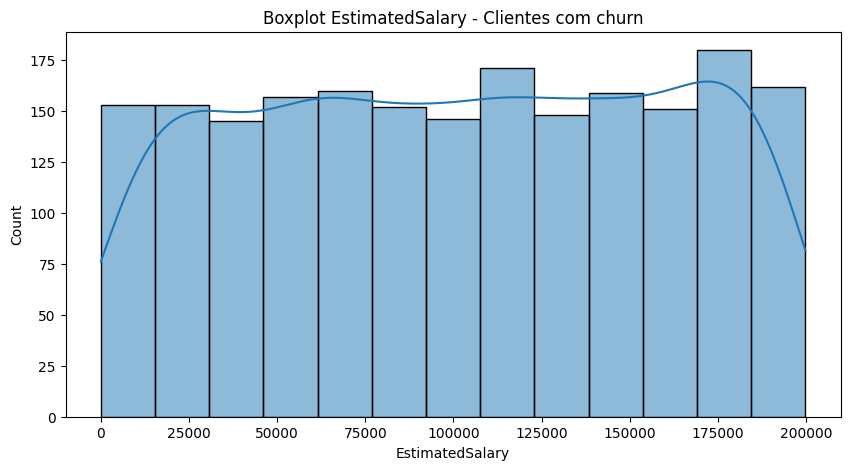

In [184]:
histogram(churn_df, 'EstimatedSalary', 'Clientes com churn')

## Outliers

In [185]:
def boxplot(df, column, title_posfix):
    plt.figure(figsize=(10, 5))
    plt.title(f'Boxplot {column} - {title_posfix}')
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.show()
    plt.close()

### Clientes sem churn

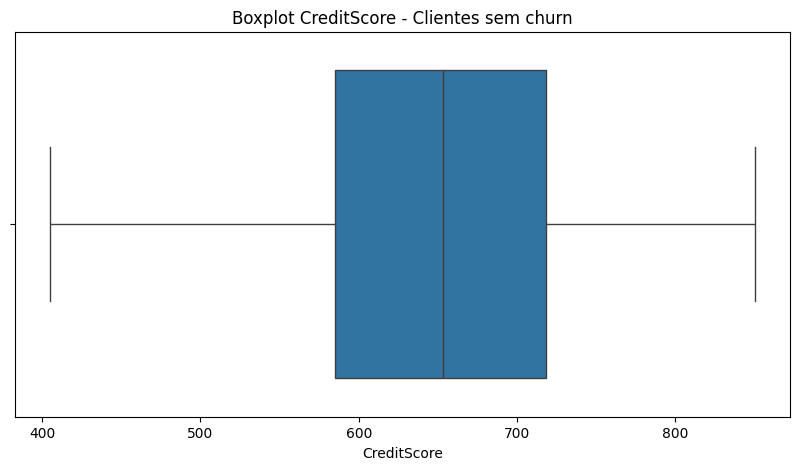

In [186]:
boxplot(no_churn_df, 'CreditScore', 'Clientes sem churn')

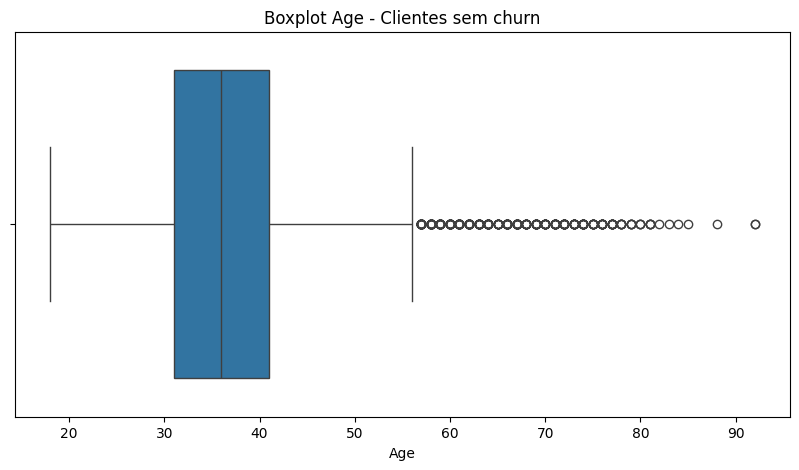

In [187]:
boxplot(no_churn_df, 'Age', 'Clientes sem churn')

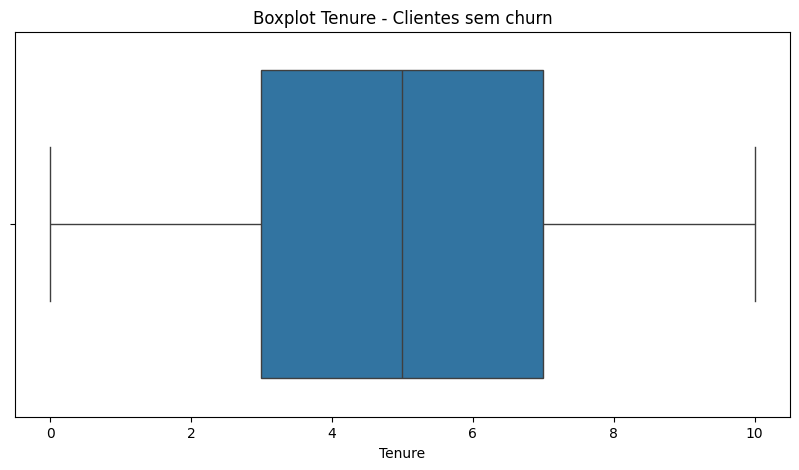

In [188]:
boxplot(no_churn_df, 'Tenure', 'Clientes sem churn')

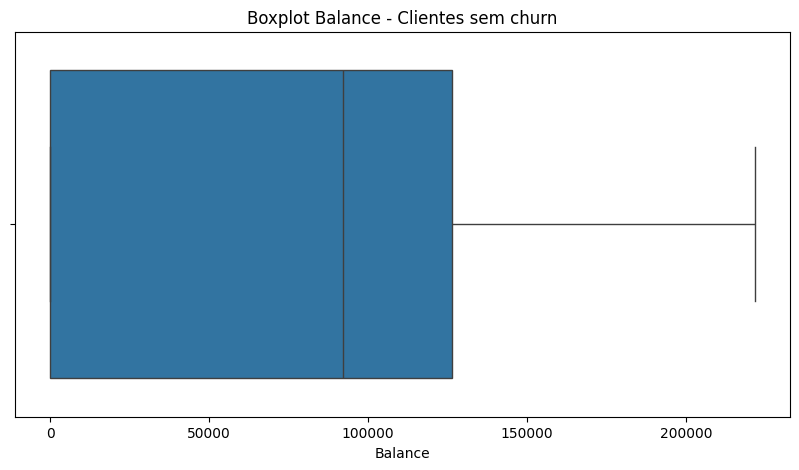

In [189]:
boxplot(no_churn_df, 'Balance', 'Clientes sem churn')

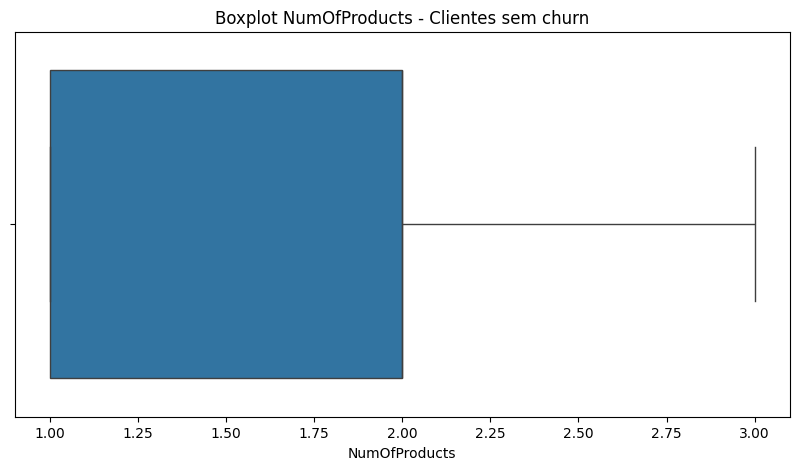

In [190]:
boxplot(no_churn_df, 'NumOfProducts', 'Clientes sem churn')

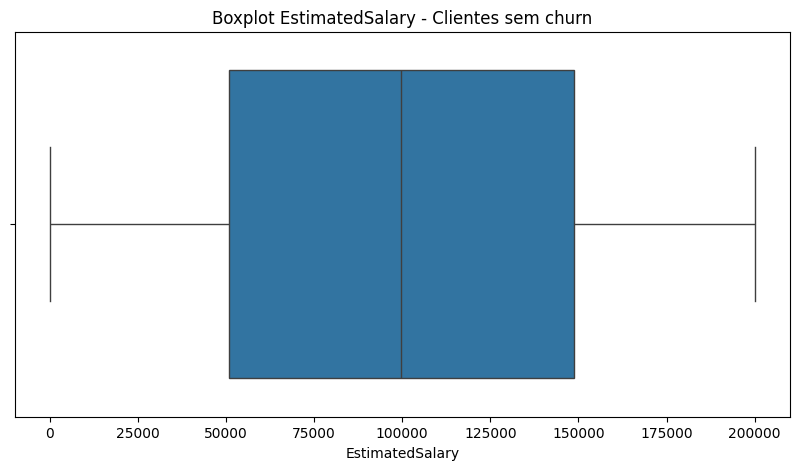

In [191]:
boxplot(no_churn_df, 'EstimatedSalary', 'Clientes sem churn')

### Clientes com churn

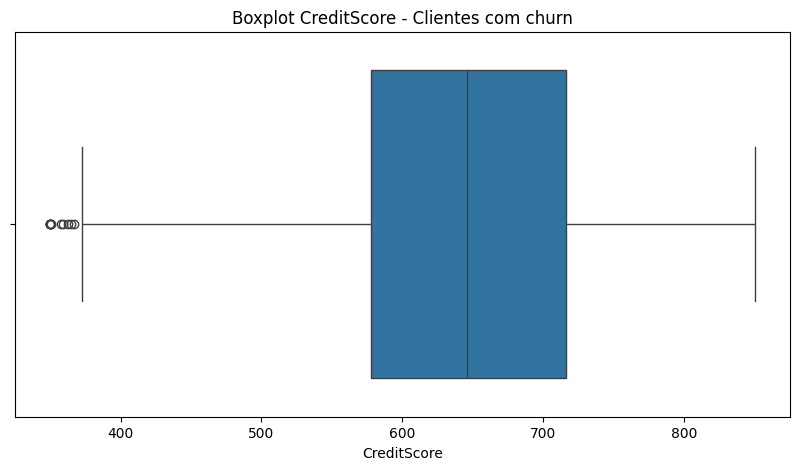

In [192]:
boxplot(churn_df, 'CreditScore', 'Clientes com churn')

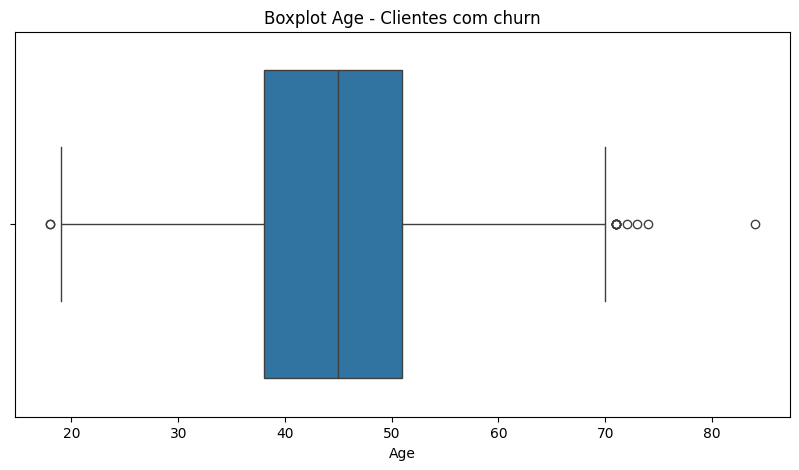

In [193]:
boxplot(churn_df, 'Age', 'Clientes com churn')

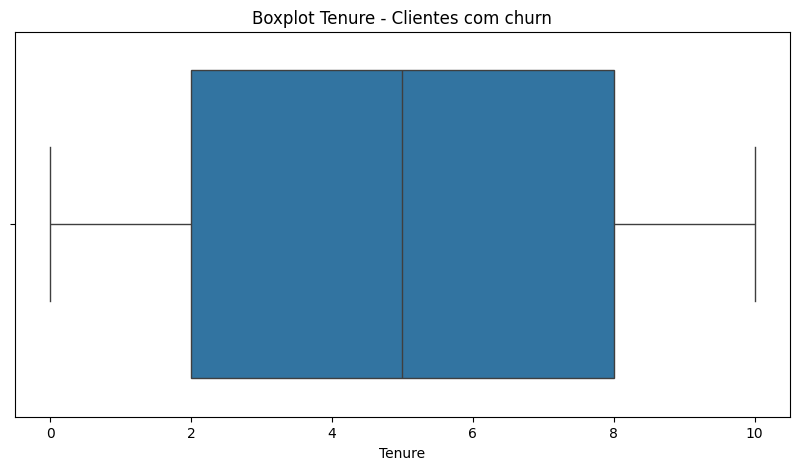

In [194]:
boxplot(churn_df, 'Tenure', 'Clientes com churn')

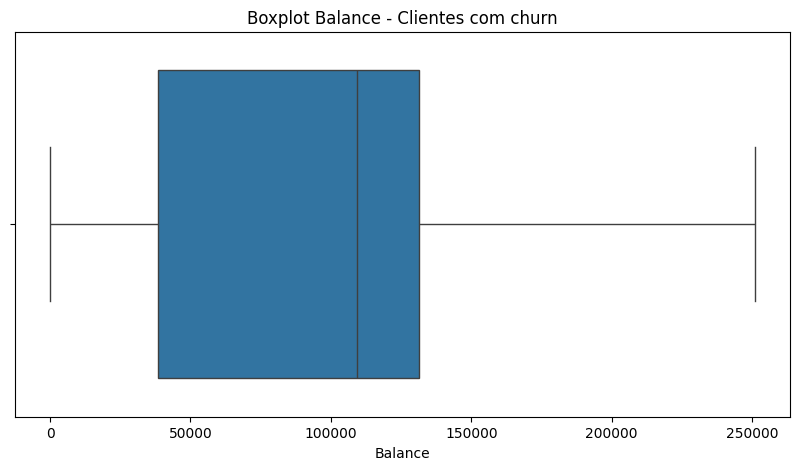

In [195]:
boxplot(churn_df, 'Balance', 'Clientes com churn')

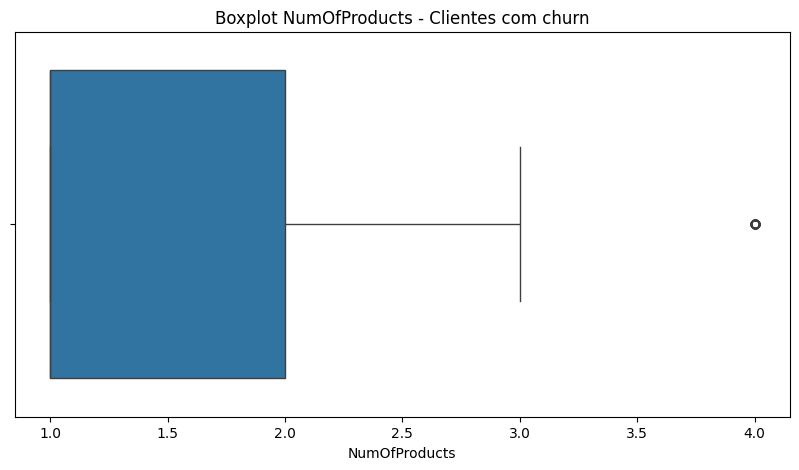

In [196]:
boxplot(churn_df, 'NumOfProducts', 'Clientes com churn')

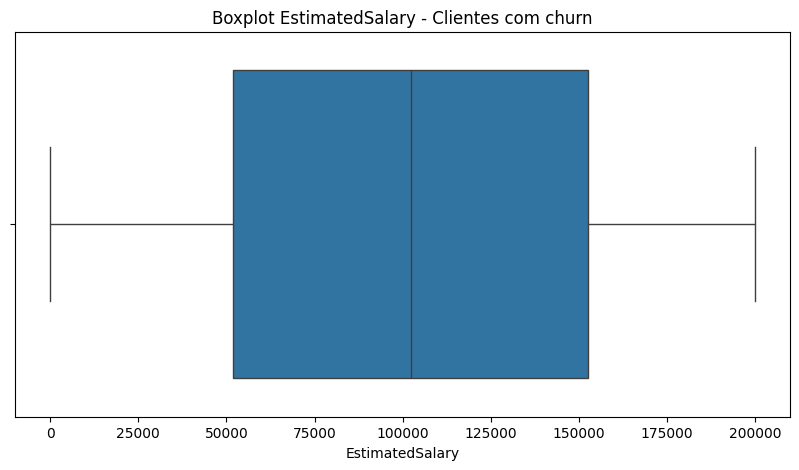

In [197]:
boxplot(churn_df, 'EstimatedSalary', 'Clientes com churn')